In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
def score_model(model, x, y, n_splits=10, n_repeats=10):
    scoring = 'neg_root_mean_squared_error'
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=seed)
    scores = cross_val_score(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

In [3]:
def plot_predictions(linreg_model, df, index, x, y):
    d = df['Data/Hora'].values
    test_series = pd.DataFrame({'ccs28':y}, index=pd.to_datetime(d))
    pred_series = linreg_model.predict(scaler.transform(x))
    pred_series = pd.DataFrame({'ccs28-pred' : pred_series}, index=pd.to_datetime(d))

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

    test_series.plot(ax=ax)
    ax.axvline(test_series.index[index], color='r') # end of train dataset
    pred_series[index:].plot(ax=ax)
    ax.grid(which="both")
    ax.legend(["train and test series", "end of train series", 'predicted'], loc="upper left")
    # ax.set_xlabel('Period', labelpad=20, fontsize=15)
    ax.set_ylabel('Compressive Strength - MPa', labelpad=20, fontsize=15)
    plt.show()

In [4]:
name = "dados-historicos-partner_i-cement-CPIIF40.csv"
df_r3d_and_r7d = pd.read_csv("../../data/interim/" + "r3d-and-r7d-" + name)
df_r3d_only = pd.read_csv("../../data/interim/" + "r3d-only-" + name)
df_no_r3d_r7d = pd.read_csv("../../data/interim/" + "no-r3d-r7d-" + name)

In [5]:
seed = 47
scaler = StandardScaler()

# Linear Regression

In [6]:
linreg_model = LinearRegression()

<h2> Here we will make a Repeated KFold Cross validation with all 3 datasets</h2>

<h3>Experiment 1</h3>
<h4> Repeated KFold Cross Validation - df_no_r3d_r7d</h4>

<b>Dataset: df_no_r3d_r7d:</b> In this dataset the R3D and R7D variables are not considered.

In [7]:
y = df_no_r3d_r7d.pop('R28D').values
x = df_no_r3d_r7d.drop(['Data/Hora'], axis=1).values

In [8]:
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = cross_val_score(pipeline, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.400 (0.151)


In [9]:
repeats = range(1,16)
results = list()

print("RMSE")
for r in repeats:
    scores = score_model(pipeline, x, y, n_repeats=r)
    scores = np.abs(scores)
    print('>%d mean=%.4f std=%.3f se=%.3f' % (r, np.mean(scores), np.std(scores), np.std(scores)/np.sqrt(r)))
    results.append(scores)

RMSE
>1 mean=1.3911 std=0.182 se=0.182
>2 mean=1.4015 std=0.189 se=0.133
>3 mean=1.3994 std=0.177 se=0.102
>4 mean=1.3973 std=0.184 se=0.092
>5 mean=1.3972 std=0.170 se=0.076
>6 mean=1.3950 std=0.165 se=0.067
>7 mean=1.3967 std=0.164 se=0.062
>8 mean=1.3976 std=0.159 se=0.056
>9 mean=1.3989 std=0.156 se=0.052
>10 mean=1.4000 std=0.151 se=0.048
>11 mean=1.3991 std=0.153 se=0.046
>12 mean=1.3990 std=0.151 se=0.043
>13 mean=1.4001 std=0.150 se=0.042
>14 mean=1.4007 std=0.149 se=0.040
>15 mean=1.4000 std=0.148 se=0.038


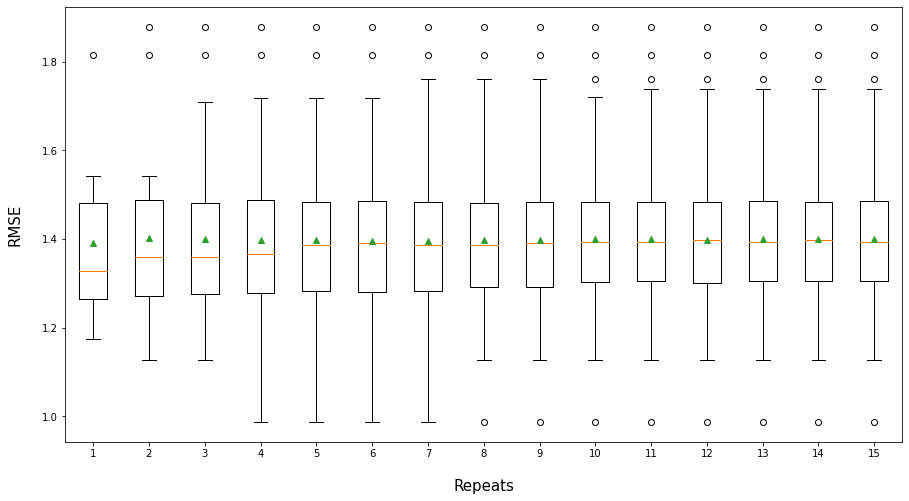

In [10]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('RMSE', labelpad=20, fontsize=15)
plt.xlabel('Repeats', labelpad=20, fontsize=15)
plt.show()

In [11]:
linreg_model = LinearRegression()
index = -98

linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 2.274347383296796


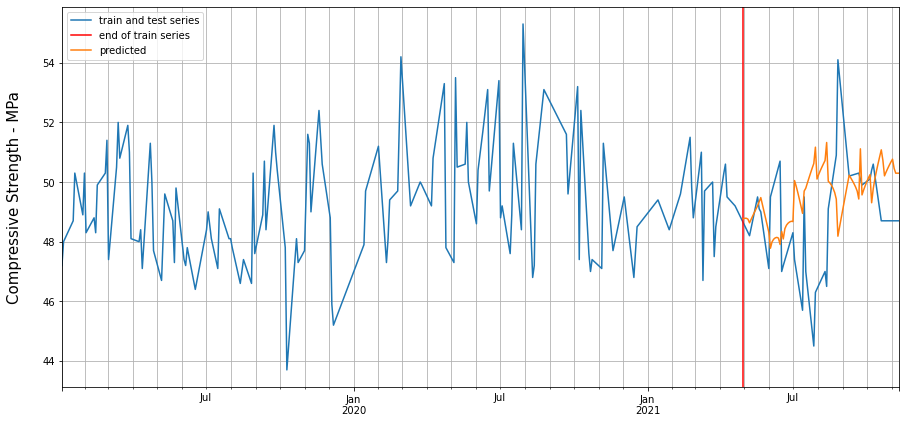

In [12]:
plot_predictions(linreg_model, df_no_r3d_r7d, index, x, y)

<h3>Experiment 2</h3>
<h4> Repeated KFold Cross Validation - df_r3d-only</h4>

<b>Dataset: df_r3d-only:</b> In this dataset the R7D variable is not considered.

In [13]:
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])

In [14]:
y = df_r3d_only.pop('R28D').values
x = df_r3d_only.drop(['Data/Hora'], axis=1).values

In [15]:
scores = score_model(pipeline, x, y, n_splits=10, n_repeats=10)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.319 (0.147)


In [16]:
# https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

repeats = range(1,16)
results = list()

print("RMSE")
for r in repeats:
    scores = score_model(pipeline, x, y, n_repeats=r)
    scores = np.abs(scores)
    print('>%d mean=%.4f std=%.3f se=%.3f' % (r, np.mean(scores), np.std(scores), np.std(scores)/np.sqrt(r)))
    results.append(scores)

RMSE
>1 mean=1.3140 std=0.197 se=0.197
>2 mean=1.3220 std=0.167 se=0.118
>3 mean=1.3212 std=0.152 se=0.088
>4 mean=1.3186 std=0.173 se=0.087
>5 mean=1.3183 std=0.163 se=0.073
>6 mean=1.3159 std=0.158 se=0.065
>7 mean=1.3161 std=0.160 se=0.061
>8 mean=1.3178 std=0.154 se=0.055
>9 mean=1.3190 std=0.149 se=0.050
>10 mean=1.3189 std=0.147 se=0.047
>11 mean=1.3173 std=0.150 se=0.045
>12 mean=1.3168 std=0.150 se=0.043
>13 mean=1.3179 std=0.150 se=0.042
>14 mean=1.3186 std=0.149 se=0.040
>15 mean=1.3189 std=0.150 se=0.039


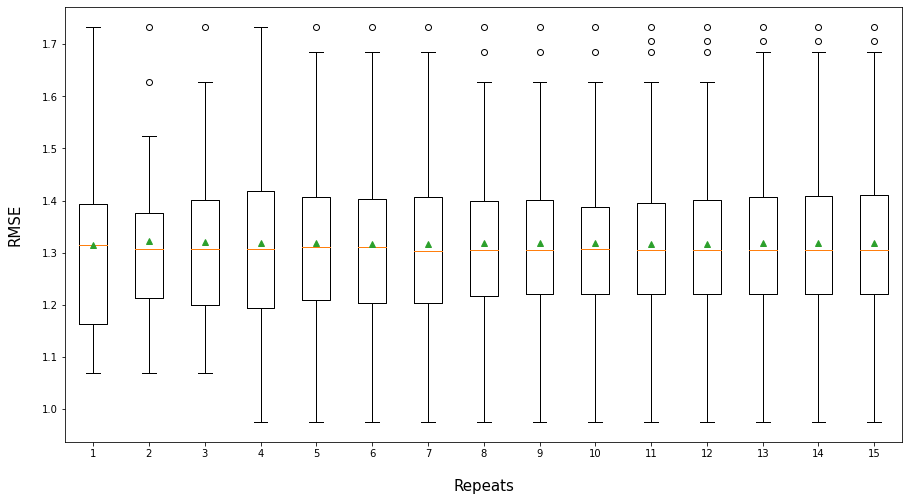

In [17]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('RMSE', labelpad=20, fontsize=15)
plt.xlabel('Repeats', labelpad=20, fontsize=15)
plt.show()

In [18]:
linreg_model = LinearRegression()
index = -98
linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 1.8907325998545637


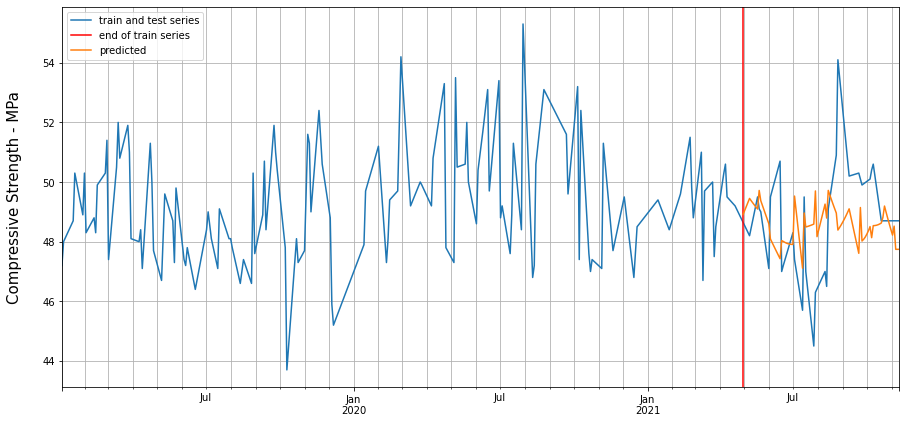

In [19]:
plot_predictions(linreg_model, df_r3d_only, index, x, y)

<h3>Experiment 3</h3>
<h4> Repeated KFold Cross Validation - df_r3d-and-rd7</h4>

<b>Dataset: df_r3d_and_r7d:</b> In this dataset both R3D and R7D variables are considered.

In [20]:
y = df_r3d_and_r7d.pop('R28D').values
x = df_r3d_and_r7d.drop(['Data/Hora'], axis=1).values

In [21]:
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])
scores = score_model(pipeline, x, y, n_splits=10, n_repeats=10)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.227 (0.146)


In [22]:
repeats = range(1,16)
results = list()

print("RMSE")
for r in repeats:
    scores = score_model(pipeline, x, y, n_repeats=r)
    scores = np.abs(scores)
    print('>%d mean=%.4f std=%.3f se=%.3f' % (r, np.mean(scores), np.std(scores), np.std(scores)/np.sqrt(r)))
    results.append(scores)

RMSE
>1 mean=1.2190 std=0.177 se=0.177
>2 mean=1.2307 std=0.160 se=0.113
>3 mean=1.2322 std=0.148 se=0.085
>4 mean=1.2319 std=0.155 se=0.078
>5 mean=1.2285 std=0.154 se=0.069
>6 mean=1.2268 std=0.149 se=0.061
>7 mean=1.2264 std=0.153 se=0.058
>8 mean=1.2277 std=0.149 se=0.053
>9 mean=1.2281 std=0.146 se=0.049
>10 mean=1.2272 std=0.146 se=0.046
>11 mean=1.2251 std=0.149 se=0.045
>12 mean=1.2253 std=0.147 se=0.042
>13 mean=1.2262 std=0.147 se=0.041
>14 mean=1.2268 std=0.146 se=0.039
>15 mean=1.2266 std=0.145 se=0.037


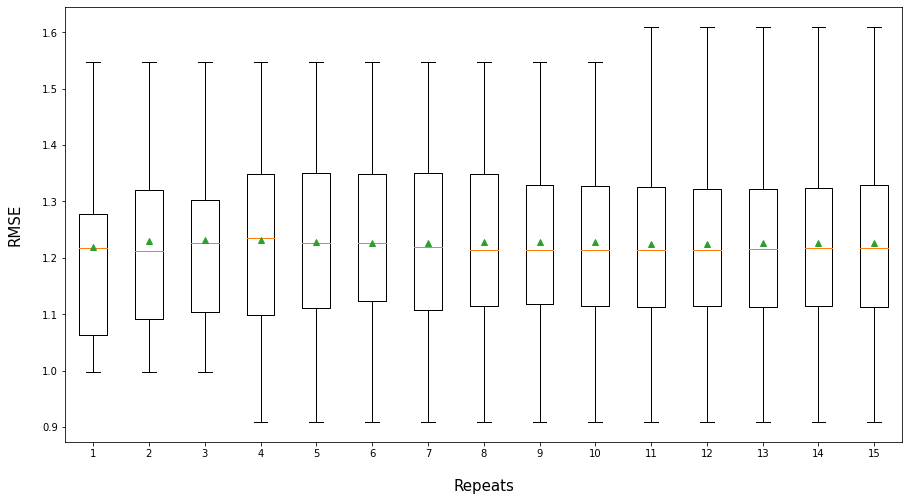

In [23]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('RMSE', labelpad=20, fontsize=15)
plt.xlabel('Repeats', labelpad=20, fontsize=15)
plt.show()

In [24]:
linreg_model = LinearRegression()
index = -98
linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 1.6488593246667071


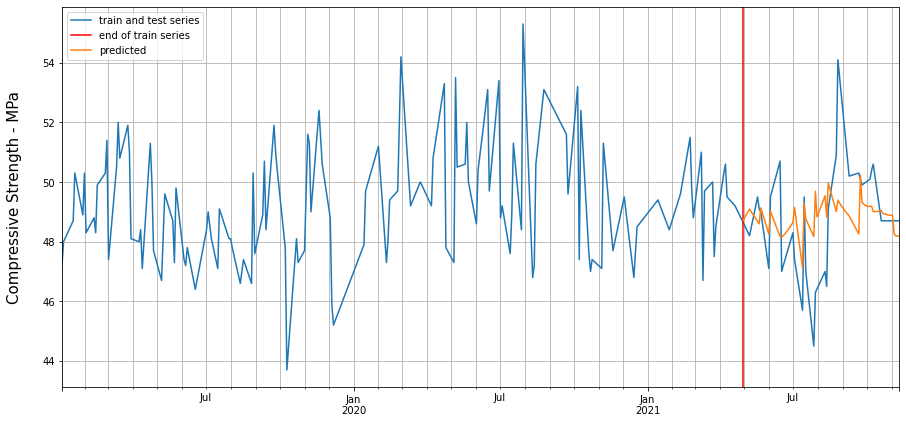

In [25]:
plot_predictions(linreg_model, df_r3d_and_r7d, index, x, y)

In [26]:
linreg_model = LinearRegression()
index = -98
linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 1.6488593246667071


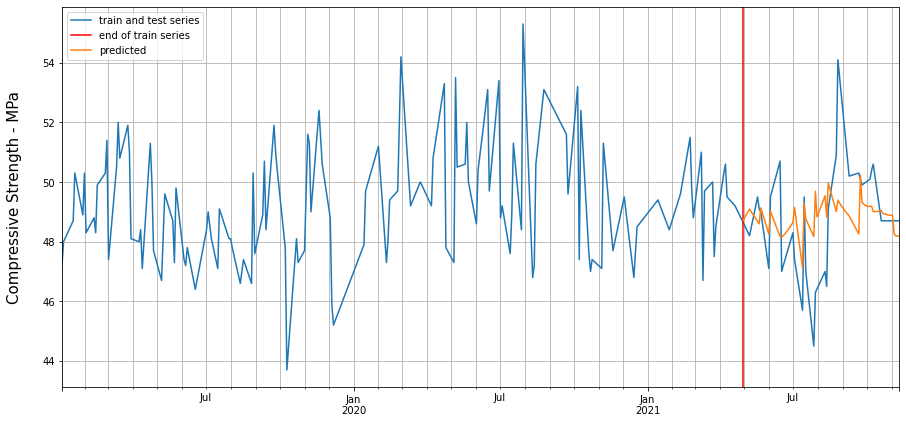

In [27]:
plot_predictions(linreg_model, df_r3d_and_r7d, index, x, y)